In [6]:
import numpy as np
from env.reputation_environment import ReputationEnvironment
from env.evaluator import EnvironmentRecorder, NetworkEvaluator

ModuleNotFoundError: No module named 'shortuuid'

In [2]:
from custom_policies import *

In [3]:
def run_experiment(num_runs, env_hyperparameters, strategy_probs):
    for _ in range(num_runs):
        env = ReputationEnvironment(**env_hyperparameters)
        # env = ReputationEnvironment(n_authors=10, n_conferences=1, render_mode="all", max_rewardless_steps=150, max_agent_steps=5000, max_coauthors=10)
        recorder = EnvironmentRecorder(env)
        observations, infos = env.reset()
        agent_to_strategy = {}
        strats, probs = zip(*strategy_probs.items())
        for agent in env.agents:
            agent_to_strategy[agent] = np.random.choice(list(strats), p=probs)
        recorder.agent_to_strategy = agent_to_strategy

        while len(env.agents) > 0:
            # this is where you would insert your policy
            actions = {}
            for agent in env.agents:
                if agent_to_strategy[agent] == "honest":
                    actions[agent] = simple_policy(agent, env)
                elif agent_to_strategy[agent] == "malicious":
                    actions[agent] = malicious_policy(agent, env)
                elif agent_to_strategy[agent] == "diligent":
                    actions[agent] = diligent_policy(agent, env)
                else:
                    actions[agent] = random_policy(agent, env)
            observations, rewards, terminations, truncations, infos = env.step(actions)
            # breakpoint()
            # env.render()
            # sleep(0.5)
            if env.timestep > 1000:
                break

        if env.render_mode == "network":
            evaluator = NetworkEvaluator(
                {
                    "nodes": list(env.network_nodes.values()), 
                    "links": env.network_links,
                    "steps": env.timestep,
                    "initial_reputation": env.initial_reputation,
                    "agent_strategy": agent_to_strategy,
                    "remaining_agents": env.agents
                }
            )
            evaluator.report()
        else:
            recorder.report()
        # env.render()
        env.close

In [4]:
params1 = {
    "n_authors":500,
    "n_conferences":10,
    "render_mode":"network",
    "max_rewardless_steps":150,
    "max_agent_steps":5000, 
    "max_coauthors":10
}
strats = {
    "diligent": 1,
    "honest": 0,
    "malicious":0
}
run_experiment(5, params1, strats)


Analysis from network file
--------------------
simulation with 500 authors went on for 1001 steps.
442 agents remain.
number of papers submitted: 8315
number of papers accepted: 4547
average number of coauthors per author: 3.08
Agent strategies:
  - before: diligent: 1.0
  - after: diligent: 1.00
mean reputation increase: 47.028
mean effort put into submitted papers: 52.50
median effort put into submitted papers: 52.00
conference submissions, publications and acceptance rates: 
 - conference_0_0 (reputation: 450):   52/80   (0.65)
 - conference_1_0 (reputation: 500):   50/119  (0.42)
 - conference_2_0 (reputation: 400):   51/56   (0.91)
 - conference_3_0 (reputation: 400):   50/63   (0.79)
 - conference_4_0 (reputation: 500):   51/142  (0.36)
 - conference_5_0 (reputation: 400):   51/62   (0.82)
 - conference_6_0 (reputation: 450):   50/83   (0.60)
 - conference_7_0 (reputation: 400):   51/59   (0.86)
 - conference_8_0 (reputation: 500):   50/168  (0.30)
 - conference_9_0 (reputation

In [4]:
params1 = {
    "n_authors":500,
    "n_conferences":10,
    "render_mode":"network",
    "max_rewardless_steps":150,
    "max_agent_steps":5000, 
    "max_coauthors":10
}
strats = {
    "diligent": 1,
    "honest": 0,
    "malicious":0
}
run_experiment(5, params1, strats)


Analysis from network file
--------------------
simulation with 500 authors went on for 1001 steps.
424 agents remain.
number of papers submitted: 8032
number of papers accepted: 4166
average number of coauthors per author: 3.08
Agent strategies:
  - before: diligent: 1.0
  - after: diligent: 1.00
mean reputation increase: 43.568
mean effort put into submitted papers: 52.45
median effort put into submitted papers: 52.00
conference submissions, publications and acceptance rates: 
 - conference_0_0 (reputation: 400):   51/60   (0.85)
 - conference_1_0 (reputation: 450):   51/82   (0.62)
 - conference_2_0 (reputation: 450):   51/74   (0.69)
 - conference_3_0 (reputation: 450):   51/79   (0.65)
 - conference_4_0 (reputation: 500):   51/152  (0.34)
 - conference_5_0 (reputation: 400):   50/60   (0.83)
 - conference_6_0 (reputation: 400):   50/53   (0.94)
 - conference_7_0 (reputation: 500):   50/160  (0.31)
 - conference_8_0 (reputation: 500):   50/155  (0.32)
 - conference_9_0 (reputation

In [38]:
reps1 = np.array([38.798, 46.278, 37.004, 44.386, 43.868])
print(np.mean(reps1))
print(np.std(reps1)/np.mean(reps1))


42.06679999999999
0.08416275920864379


In [39]:
params2 = {
    "n_authors":500,
    "n_conferences":10,
    "render_mode":"network",
    "max_rewardless_steps":150,
    "max_agent_steps":5000, 
    "max_coauthors":10
}
strats2 = {
    "diligent": 0,
    "honest": 1,
    "malicious":0
}
run_experiment(5, params2, strats2)

NameError: name 'np' is not defined

In [21]:
reps2 = [4.31, 5.566, 4.242, 6.732, 3.984]
print(np.mean(reps2))
print(np.std(reps2)/np.mean(reps2))


4.966799999999999
0.20918870113700974


In [16]:
params3 = {
    "n_authors": 500,
    "n_conferences": 10,
    "render_mode": "network",
    "max_rewardless_steps": 150,
    "max_agent_steps": 5000, 
    "max_coauthors": 10
}
strats3 = {
    "diligent": 0,
    "honest": 0,
    "malicious": 1
}
run_experiment(5, params3, strats3)


Analysis from network file
--------------------
simulation with 500 authors went on for 495 steps.
0 agents remain.
number of papers submitted: 3912
number of papers accepted: 189
average number of coauthors per author: 3.89
Agent strategies:
  - before: malicious: 1.0
  - after: 
mean reputation increase: 2.062
mean effort put into submitted papers: 23.05
median effort put into submitted papers: 22.00
conference submissions, publications and acceptance rates: 
 - conference_0_0 (reputation: 450):   18/402  (0.04)
 - conference_1_0 (reputation: 450):   16/394  (0.04)
 - conference_2_0 (reputation: 450):   19/396  (0.05)
 - conference_3_0 (reputation: 500):   20/421  (0.05)
 - conference_4_0 (reputation: 500):   19/396  (0.05)
 - conference_5_0 (reputation: 500):   22/388  (0.06)
 - conference_6_0 (reputation: 400):   15/379  (0.04)
 - conference_7_0 (reputation: 450):   20/374  (0.05)
 - conference_8_0 (reputation: 500):   19/374  (0.05)
 - conference_9_0 (reputation: 500):   21/388  

In [20]:
reps3 = [1.92, 2.534, 2.504, 2.44, 2.662]
print(np.mean(reps3))
print(np.std(reps3)/np.mean(reps3))


2.412
0.10630040126025835


In [23]:
params3 = {
    "n_authors": 500,
    "n_conferences": 10,
    "render_mode": "network",
    "max_rewardless_steps": 150,
    "max_agent_steps": 5000, 
    "max_coauthors": 25
}
strats3 = {
    "diligent": 0,
    "honest": 0,
    "malicious": 1
}
run_experiment(5, params3, strats3)


Analysis from network file
--------------------
simulation with 500 authors went on for 568 steps.
0 agents remain.
number of papers submitted: 4117
number of papers accepted: 209
average number of coauthors per author: 3.85
Agent strategies:
  - before: malicious: 1.0
  - after: 
mean reputation increase: 2.226
mean effort put into submitted papers: 23.04
median effort put into submitted papers: 22.00
conference submissions, publications and acceptance rates: 
 - conference_0_0 (reputation: 450):   26/396  (0.07)
 - conference_1_0 (reputation: 400):   27/419  (0.06)
 - conference_2_0 (reputation: 400):   13/430  (0.03)
 - conference_3_0 (reputation: 450):   12/419  (0.03)
 - conference_4_0 (reputation: 500):   22/410  (0.05)
 - conference_5_0 (reputation: 450):   20/385  (0.05)
 - conference_6_0 (reputation: 500):   17/421  (0.04)
 - conference_7_0 (reputation: 400):   27/426  (0.06)
 - conference_8_0 (reputation: 500):   27/411  (0.07)
 - conference_9_0 (reputation: 450):   18/400  

In [24]:
params5 = {
    "n_authors": 500,
    "n_conferences": 10,
    "render_mode": "network",
    "max_rewardless_steps": 150,
    "max_agent_steps": 5000, 
    "max_coauthors": 25
}
strats5 = {
    "diligent": 0,
    "honest": 1,
    "malicious": 0
}
run_experiment(5, params5, strats5)


Analysis from network file
--------------------
simulation with 500 authors went on for 746 steps.
0 agents remain.
number of papers submitted: 3142
number of papers accepted: 638
average number of coauthors per author: 3.02
Agent strategies:
  - before: honest: 1.0
  - after: 
mean reputation increase: 6.27
mean effort put into submitted papers: 42.48
median effort put into submitted papers: 42.00
conference submissions, publications and acceptance rates: 
 - conference_0_0 (reputation: 400):   50/116  (0.43)
 - conference_1_0 (reputation: 450):   50/276  (0.18)
 - conference_2_0 (reputation: 500):   35/319  (0.11)
 - conference_3_0 (reputation: 400):   50/121  (0.41)
 - conference_4_0 (reputation: 500):   29/316  (0.09)
 - conference_5_0 (reputation: 400):   50/131  (0.38)
 - conference_6_0 (reputation: 400):   50/117  (0.43)
 - conference_7_0 (reputation: 500):   25/303  (0.08)
 - conference_8_0 (reputation: 400):   51/109  (0.47)
 - conference_9_0 (reputation: 450):   50/249  (0.2

In [25]:
params7 = {
    "n_authors": 500,
    "n_conferences": 25,
    "render_mode": "network",
    "max_rewardless_steps": 150,
    "max_agent_steps": 5000, 
    "max_coauthors": 10
}
strats7 = {
    "diligent": 0,
    "honest": 0,
    "malicious": 1
}
run_experiment(5, params7, strats7)


Analysis from network file
--------------------
simulation with 500 authors went on for 526 steps.
0 agents remain.
number of papers submitted: 4034
number of papers accepted: 220
average number of coauthors per author: 3.83
Agent strategies:
  - before: malicious: 1.0
  - after: 
mean reputation increase: 2.402
mean effort put into submitted papers: 22.92
median effort put into submitted papers: 22.00
conference submissions, publications and acceptance rates: 
 - conference_0_0 (reputation: 400):   12/140  (0.09)
 - conference_1_0 (reputation: 400):    9/170  (0.05)
 - conference_2_0 (reputation: 450):    9/153  (0.06)
 - conference_3_0 (reputation: 500):    7/160  (0.04)
 - conference_4_0 (reputation: 500):   12/159  (0.08)
 - conference_5_0 (reputation: 500):    4/140  (0.03)
 - conference_6_0 (reputation: 500):    5/160  (0.03)
 - conference_7_0 (reputation: 500):    9/150  (0.06)
 - conference_8_0 (reputation: 450):    9/155  (0.06)
 - conference_9_0 (reputation: 450):   12/165  

In [2]:
a = {"meta":{"count":202699731,"db_response_time_ms":670,"page":1,"per_page":200,"groups_count":200},"group_by":[{"key":"2016","key_display_name":"2016","count":7242598},{"key":"2015","key_display_name":"2015","count":7208385},{"key":"2020","key_display_name":"2020","count":7156898},{"key":"2014","key_display_name":"2014","count":7117861},{"key":"2019","key_display_name":"2019","count":7043326},{"key":"2013","key_display_name":"2013","count":6897176},{"key":"2017","key_display_name":"2017","count":6827842},{"key":"2018","key_display_name":"2018","count":6793917},{"key":"2012","key_display_name":"2012","count":6642531},{"key":"2021","key_display_name":"2021","count":6579387},{"key":"2011","key_display_name":"2011","count":6417349},{"key":"2024","key_display_name":"2024","count":6312855},{"key":"2010","key_display_name":"2010","count":6078242},{"key":"2023","key_display_name":"2023","count":6031784},{"key":"2022","key_display_name":"2022","count":5753333},{"key":"2009","key_display_name":"2009","count":5703963},{"key":"2008","key_display_name":"2008","count":5302470},{"key":"2007","key_display_name":"2007","count":4917853},{"key":"2006","key_display_name":"2006","count":4693494},{"key":"2005","key_display_name":"2005","count":4329348},{"key":"2004","key_display_name":"2004","count":3971041},{"key":"2025","key_display_name":"2025","count":3750045},{"key":"2003","key_display_name":"2003","count":3699325},{"key":"2002","key_display_name":"2002","count":3568185},{"key":"2001","key_display_name":"2001","count":3016832},{"key":"2000","key_display_name":"2000","count":2851081},{"key":"1999","key_display_name":"1999","count":2511020},{"key":"1998","key_display_name":"1998","count":2387874},{"key":"1997","key_display_name":"1997","count":2287348},{"key":"1996","key_display_name":"1996","count":2177531},{"key":"1995","key_display_name":"1995","count":2019924},{"key":"1994","key_display_name":"1994","count":1907552},{"key":"1993","key_display_name":"1993","count":1807798},{"key":"1992","key_display_name":"1992","count":1718286},{"key":"1990","key_display_name":"1990","count":1669461},{"key":"1991","key_display_name":"1991","count":1656562},{"key":"1989","key_display_name":"1989","count":1529462},{"key":"1988","key_display_name":"1988","count":1443414},{"key":"1987","key_display_name":"1987","count":1388831},{"key":"1986","key_display_name":"1986","count":1323364},{"key":"1985","key_display_name":"1985","count":1261831},{"key":"1984","key_display_name":"1984","count":1210738},{"key":"1983","key_display_name":"1983","count":1174014},{"key":"1982","key_display_name":"1982","count":1130541},{"key":"1980","key_display_name":"1980","count":1107551},{"key":"1981","key_display_name":"1981","count":1096506},{"key":"1979","key_display_name":"1979","count":1006975},{"key":"1978","key_display_name":"1978","count":966534},{"key":"1977","key_display_name":"1977","count":933411},{"key":"1976","key_display_name":"1976","count":897843},{"key":"1975","key_display_name":"1975","count":881127},{"key":"1970","key_display_name":"1970","count":846612},{"key":"1974","key_display_name":"1974","count":842914},{"key":"1973","key_display_name":"1973","count":821466},{"key":"1972","key_display_name":"1972","count":802445},{"key":"1971","key_display_name":"1971","count":771193},{"key":"1969","key_display_name":"1969","count":715197},{"key":"1968","key_display_name":"1968","count":667645},{"key":"1967","key_display_name":"1967","count":626541},{"key":"1966","key_display_name":"1966","count":585413},{"key":"1965","key_display_name":"1965","count":547968},{"key":"1964","key_display_name":"1964","count":502164},{"key":"1963","key_display_name":"1963","count":472363},{"key":"1962","key_display_name":"1962","count":432599},{"key":"1960","key_display_name":"1960","count":420915},{"key":"1961","key_display_name":"1961","count":411012},{"key":"1959","key_display_name":"1959","count":374431},{"key":"1958","key_display_name":"1958","count":353251},{"key":"1957","key_display_name":"1957","count":338614},{"key":"1956","key_display_name":"1956","count":321795},{"key":"1955","key_display_name":"1955","count":313105},{"key":"1954","key_display_name":"1954","count":304233},{"key":"1953","key_display_name":"1953","count":295711},{"key":"1952","key_display_name":"1952","count":284770},{"key":"1951","key_display_name":"1951","count":273006},{"key":"1950","key_display_name":"1950","count":263732},{"key":"1949","key_display_name":"1949","count":203126},{"key":"1948","key_display_name":"1948","count":190328},{"key":"1947","key_display_name":"1947","count":167359},{"key":"1940","key_display_name":"1940","count":159474},{"key":"1938","key_display_name":"1938","count":144127},{"key":"1946","key_display_name":"1946","count":141856},{"key":"1936","key_display_name":"1936","count":141832},{"key":"1939","key_display_name":"1939","count":141528},{"key":"1937","key_display_name":"1937","count":141304},{"key":"1935","key_display_name":"1935","count":138802},{"key":"1934","key_display_name":"1934","count":133649},{"key":"1933","key_display_name":"1933","count":133262},{"key":"1932","key_display_name":"1932","count":131290},{"key":"1930","key_display_name":"1930","count":129801},{"key":"1931","key_display_name":"1931","count":127842},{"key":"1941","key_display_name":"1941","count":125396},{"key":"1942","key_display_name":"1942","count":120614},{"key":"1929","key_display_name":"1929","count":120567},{"key":"1928","key_display_name":"1928","count":115737},{"key":"1943","key_display_name":"1943","count":111898},{"key":"1927","key_display_name":"1927","count":111830},{"key":"1945","key_display_name":"1945","count":110785},{"key":"1926","key_display_name":"1926","count":106447},{"key":"1944","key_display_name":"1944","count":105995},{"key":"1925","key_display_name":"1925","count":99579},{"key":"1924","key_display_name":"1924","count":94519},{"key":"1923","key_display_name":"1923","count":88739},{"key":"1922","key_display_name":"1922","count":85861},{"key":"1921","key_display_name":"1921","count":79348},{"key":"1913","key_display_name":"1913","count":75313},{"key":"1920","key_display_name":"1920","count":74843},{"key":"1912","key_display_name":"1912","count":73571},{"key":"1914","key_display_name":"1914","count":73294},{"key":"1910","key_display_name":"1910","count":72980},{"key":"1911","key_display_name":"1911","count":72359},{"key":"1909","key_display_name":"1909","count":70718},{"key":"1915","key_display_name":"1915","count":69538},{"key":"1916","key_display_name":"1916","count":67830},{"key":"1908","key_display_name":"1908","count":67710},{"key":"1919","key_display_name":"1919","count":65274},{"key":"1907","key_display_name":"1907","count":65134},{"key":"1906","key_display_name":"1906","count":64770},{"key":"1917","key_display_name":"1917","count":64514},{"key":"1918","key_display_name":"1918","count":63793},{"key":"1905","key_display_name":"1905","count":62115},{"key":"1904","key_display_name":"1904","count":61636},{"key":"1903","key_display_name":"1903","count":60371},{"key":"1902","key_display_name":"1902","count":59143},{"key":"1900","key_display_name":"1900","count":58741},{"key":"1901","key_display_name":"1901","count":57114},{"key":"1899","key_display_name":"1899","count":57099},{"key":"1898","key_display_name":"1898","count":54350},{"key":"1897","key_display_name":"1897","count":51862},{"key":"1896","key_display_name":"1896","count":51715},{"key":"1895","key_display_name":"1895","count":49818},{"key":"1894","key_display_name":"1894","count":47808},{"key":"1893","key_display_name":"1893","count":44975},{"key":"1890","key_display_name":"1890","count":42558},{"key":"1892","key_display_name":"1892","count":41824},{"key":"1888","key_display_name":"1888","count":41716},{"key":"1891","key_display_name":"1891","count":40918},{"key":"1889","key_display_name":"1889","count":40832},{"key":"1887","key_display_name":"1887","count":40244},{"key":"1886","key_display_name":"1886","count":37422},{"key":"1885","key_display_name":"1885","count":35604},{"key":"1880","key_display_name":"1880","count":34843},{"key":"1884","key_display_name":"1884","count":34787},{"key":"1883","key_display_name":"1883","count":33093},{"key":"1881","key_display_name":"1881","count":30806},{"key":"1882","key_display_name":"1882","count":29810},{"key":"1876","key_display_name":"1876","count":29369},{"key":"1879","key_display_name":"1879","count":28206},{"key":"1878","key_display_name":"1878","count":27243},{"key":"1877","key_display_name":"1877","count":25915},{"key":"1875","key_display_name":"1875","count":23793},{"key":"1874","key_display_name":"1874","count":22420},{"key":"1873","key_display_name":"1873","count":22306},{"key":"1872","key_display_name":"1872","count":20998},{"key":"1870","key_display_name":"1870","count":19988},{"key":"1871","key_display_name":"1871","count":17757},{"key":"1867","key_display_name":"1867","count":17552},{"key":"1868","key_display_name":"1868","count":17413},{"key":"1869","key_display_name":"1869","count":17171},{"key":"1863","key_display_name":"1863","count":17017},{"key":"1857","key_display_name":"1857","count":16512},{"key":"1860","key_display_name":"1860","count":16270},{"key":"1855","key_display_name":"1855","count":16240},{"key":"1866","key_display_name":"1866","count":16236},{"key":"1859","key_display_name":"1859","count":16190},{"key":"1862","key_display_name":"1862","count":15966},{"key":"1858","key_display_name":"1858","count":15825},{"key":"1856","key_display_name":"1856","count":15802},{"key":"1854","key_display_name":"1854","count":15454},{"key":"1864","key_display_name":"1864","count":15454},{"key":"1853","key_display_name":"1853","count":15027},{"key":"1861","key_display_name":"1861","count":14862},{"key":"1851","key_display_name":"1851","count":14745},{"key":"1852","key_display_name":"1852","count":14567},{"key":"1865","key_display_name":"1865","count":14352},{"key":"1850","key_display_name":"1850","count":14097},{"key":"1847","key_display_name":"1847","count":12548},{"key":"1848","key_display_name":"1848","count":12349},{"key":"1849","key_display_name":"1849","count":11473},{"key":"1846","key_display_name":"1846","count":9988},{"key":"1845","key_display_name":"1845","count":8086},{"key":"1844","key_display_name":"1844","count":7666},{"key":"1842","key_display_name":"1842","count":7644},{"key":"1843","key_display_name":"1843","count":7451},{"key":"1841","key_display_name":"1841","count":6733},{"key":"1840","key_display_name":"1840","count":6445},{"key":"1837","key_display_name":"1837","count":5948},{"key":"1839","key_display_name":"1839","count":5623},{"key":"1838","key_display_name":"1838","count":5433},{"key":"1836","key_display_name":"1836","count":5155},{"key":"1835","key_display_name":"1835","count":5091},{"key":"1834","key_display_name":"1834","count":4533},{"key":"1833","key_display_name":"1833","count":4490},{"key":"1830","key_display_name":"1830","count":4463},{"key":"1800","key_display_name":"1800","count":4329},{"key":"1829","key_display_name":"1829","count":4313},{"key":"1831","key_display_name":"1831","count":4273},{"key":"1828","key_display_name":"1828","count":4203},{"key":"1832","key_display_name":"1832","count":3961},{"key":"1827","key_display_name":"1827","count":3882}]}

In [6]:
for b in sorted(a["group_by"], key=lambda x: x["key"]):
    print(b)

{'key': '1800', 'key_display_name': '1800', 'count': 4329}
{'key': '1827', 'key_display_name': '1827', 'count': 3882}
{'key': '1828', 'key_display_name': '1828', 'count': 4203}
{'key': '1829', 'key_display_name': '1829', 'count': 4313}
{'key': '1830', 'key_display_name': '1830', 'count': 4463}
{'key': '1831', 'key_display_name': '1831', 'count': 4273}
{'key': '1832', 'key_display_name': '1832', 'count': 3961}
{'key': '1833', 'key_display_name': '1833', 'count': 4490}
{'key': '1834', 'key_display_name': '1834', 'count': 4533}
{'key': '1835', 'key_display_name': '1835', 'count': 5091}
{'key': '1836', 'key_display_name': '1836', 'count': 5155}
{'key': '1837', 'key_display_name': '1837', 'count': 5948}
{'key': '1838', 'key_display_name': '1838', 'count': 5433}
{'key': '1839', 'key_display_name': '1839', 'count': 5623}
{'key': '1840', 'key_display_name': '1840', 'count': 6445}
{'key': '1841', 'key_display_name': '1841', 'count': 6733}
{'key': '1842', 'key_display_name': '1842', 'count': 764

In [7]:
from neo4j import GraphDatabase
import numpy as np
from collections import Counter

In [18]:
# --- Neo4j connection setup ---
URI = "bolt://localhost:7690"   # adjust if using neo4j+s:// for Aura
USER = "neo4j"
PASSWORD = "openreview"
driver = GraphDatabase.driver(URI, auth=(USER, PASSWORD))

# --- Query for coauthors ---
# This query collects coauthors for a given author
COAUTHOR_QUERY = """
MATCH (a:Author)<-[:_HAS_AUTHOR]-(p:Paper)-[:_HAS_AUTHOR]->(coauthor:Author),
      (p)-[:_IS_SUBMITTED_TO]->(c:Conference)
WHERE coauthor <> a
RETURN a.id AS author, collect(DISTINCT coauthor.id) AS coauthors, COLLECT(DISTINCT c.year) AS years, COUNT(p) as p_count
"""

In [19]:

def fetch_all_coauthors():
    coauthor_dict = {}
    with driver.session(database="open-review-data") as session:
        results = session.run(COAUTHOR_QUERY)
        for record in results:
            author = record["author"]
            coauthors = record["coauthors"]
            coauthor_dict[author] = record
    return coauthor_dict    

In [20]:
coauthors_map = fetch_all_coauthors()
for author, record in coauthors_map.items():
    print(f"{author}: {record['coauthors']}, {record['years']}, {record['p_count']}")

driver.close()

chungchengc@google.com: ['craffel@gmail.com'], ['2018'], 1
craffel@gmail.com: ['chungchengc@google.com', 'goodfellow@google.com', 'augustusodena@google.com', 'avital@thewe.net', 'cubuk@google.com'], ['2018'], 5
a.w.m.smeulders@uva.nl: ['joern.jacobsen@bethgelab.org', 'edouard.oyallon@ens.fr', 'sosnovikivan@gmail.com', 'szmajamichal@gmail.com'], ['2018', '2020'], 4
edouard.oyallon@ens.fr: ['joern.jacobsen@bethgelab.org', 'a.w.m.smeulders@uva.nl'], ['2018'], 2
joern.jacobsen@bethgelab.org: ['a.w.m.smeulders@uva.nl', 'edouard.oyallon@ens.fr'], ['2018'], 2
gtzan@uvic.ca: ['ataiya@uvic.ca', 'fpeder@uvic.ca'], ['2018'], 2
fpeder@uvic.ca: ['ataiya@uvic.ca', 'gtzan@uvic.ca'], ['2018'], 2
ataiya@uvic.ca: ['gtzan@uvic.ca', 'fpeder@uvic.ca'], ['2018'], 2
yeshen@microsoft.com: ['yuqguo@microsoft.com', 'jianshuc@microsoft.com', 'jfgao@microsoft.com', 'huang.person@gmail.com', 'momohuang@gmail.com', 'wzchen@microsoft.com', 'chezhu@microsoft.com'], ['2018'], 7
jianshuc@microsoft.com: ['yuqguo@microso

In [46]:
np.mean([r["p_count"] for r in coauthors_map.values()])

np.float64(8.591252444170012)

In [47]:
Counter([r["p_count"] for r in coauthors_map.values()])

Counter({3: 6973,
         4: 6518,
         2: 5799,
         5: 5143,
         6: 3982,
         7: 2671,
         1: 2571,
         8: 2183,
         9: 1465,
         10: 1405,
         11: 1093,
         12: 965,
         13: 695,
         15: 667,
         14: 635,
         16: 510,
         17: 403,
         18: 395,
         19: 335,
         20: 317,
         22: 300,
         21: 271,
         23: 233,
         24: 208,
         26: 165,
         25: 164,
         27: 162,
         29: 144,
         28: 134,
         30: 122,
         31: 106,
         37: 94,
         32: 93,
         35: 79,
         53: 79,
         39: 78,
         34: 78,
         42: 76,
         38: 73,
         36: 70,
         33: 66,
         40: 58,
         43: 45,
         41: 43,
         46: 42,
         47: 42,
         45: 36,
         55: 33,
         48: 33,
         44: 32,
         49: 28,
         56: 25,
         50: 24,
         51: 23,
         58: 23,
         59: 21,
         62: 21

In [48]:
Counter([len(r["coauthors"]) for r in coauthors_map.values()])


Counter({3: 7529,
         4: 6931,
         2: 6088,
         5: 5750,
         6: 4132,
         7: 2940,
         1: 2754,
         8: 2087,
         9: 1570,
         10: 1287,
         11: 1069,
         12: 797,
         13: 643,
         15: 545,
         14: 493,
         16: 434,
         17: 357,
         18: 307,
         19: 291,
         22: 215,
         21: 208,
         20: 207,
         24: 138,
         23: 134,
         25: 117,
         28: 114,
         27: 108,
         29: 107,
         30: 100,
         26: 94,
         31: 70,
         32: 62,
         53: 61,
         37: 61,
         42: 56,
         39: 54,
         33: 47,
         35: 46,
         34: 40,
         36: 32,
         40: 29,
         38: 26,
         43: 26,
         41: 23,
         45: 22,
         44: 22,
         49: 19,
         47: 18,
         48: 16,
         46: 15,
         54: 12,
         58: 12,
         68: 11,
         61: 11,
         50: 10,
         60: 10,
         55: 10,


In [49]:
import networkx as nx

def merge_overlapping_sets(authors, coauthors_per_author):
    """
    Takes a list of sets and merges them into maximal overlapping sets
    using graph connected components.
    """
    G = nx.Graph()
    for author, coauthors in zip(authors,coauthors_per_author):
        for ca in coauthors:
            G.add_edge(author, ca)
    return [set(component) for component in nx.find_cliques_recursive(G)]


In [50]:
# coauthors_map_2022 = {a:record for a,record in coauthors_map.items() if record["years"]==["2022"]}
peer_groups = merge_overlapping_sets(coauthors_map.keys(), [r["coauthors"] for r in coauthors_map.values()])

In [51]:
len(peer_groups)

19989

In [52]:
peer_groups = list(peer_groups)

In [53]:
peer_groups[0]

{'michele.boggia@helsinki.fi',
 '~Alessandro_Raganato1',
 '~Jörg_Tiedemann1',
 '~Niki_Andreas_Loppi1',
 '~Raúl_Vázquez1',
 '~Stig-Arne_Grönroos1',
 '~Timothee_Mickus1'}

In [54]:
np.mean([len(g) for g in peer_groups])

np.float64(4.61808994947221)

In [55]:
np.std([len(g) for g in peer_groups])

np.float64(2.212468574504457)

In [56]:
sorted_groups = sorted([(g,len(g)) for g in peer_groups], key = lambda x:x[1], reverse=True)[:50]

In [57]:
len(sorted_groups[0][0] & sorted_groups[1][0]) == len(sorted_groups[0][0])

False

In [58]:
sorted_groups[0][0] - sorted_groups[1][0]

{'hiep256@gmail.com',
 'k.almubarak@psau.edu.sa',
 'mario@huggingface.co',
 'mrm8488@gmail.com',
 'sebastian@commoncrawl.org',
 'violette@huggingface.co',
 'vumichien1692@gmail.com',
 '~Aaron_Gokaslan1',
 '~Aitor_Soroa1',
 '~Albert_Villanova_del_Moral1',
 '~Angelina_McMillan-Major1',
 '~Anna_Rogers1',
 '~Chenghao_Mou1',
 '~Christopher_Akiki1',
 '~Daniel_Van_Strien1',
 '~David_Ifeoluwa_Adelani1',
 '~Eduardo_González_Ponferrada1',
 '~Francesco_De_Toni1',
 '~Giada_Pistilli1',
 '~Gérard_Dupont1',
 '~Hieu_Tran2',
 '~Hugo_Laurençon1',
 '~Ian_Yu1',
 '~Itziar_Gonzalez-Dios1',
 '~Javier_de_la_Rosa1',
 '~Jenny_Chim1',
 '~Jian_Zhu2',
 '~Jörg_Frohberg1',
 '~Kyle_Lo1',
 '~Leandro_Von_Werra1',
 '~Leon_Weber1',
 '~Long_Phan1',
 '~Loubna_Ben_allal1',
 '~Lucile_Saulnier1',
 '~Manan_Dey2',
 '~Maraim_Masoud1',
 '~Margaret_Mitchell3',
 '~Olivier_Nguyen1',
 '~Paulo_Villegas1',
 '~Pedro_Ortiz_Suarez1',
 '~Pierre_Colombo2',
 '~Quentin_Lhoest1',
 '~Sasha_Luccioni1',
 '~Shamik_Bose1',
 '~Shayne_Longpre1',
 '~S

In [59]:
sorted_groups[1][0] - sorted_groups[0][0]

{'grecias@google.com',
 'hellojas@google.com',
 'huongtt@google.com',
 'isabelleal@google.com',
 'jaspiar@google.com',
 'jucarbajal@google.com',
 'noahbrown@google.com',
 'reymann@google.com',
 'sicxu@google.com',
 'yuheng@google.com',
 'zitkovich@google.com',
 '~Alex_Irpan1',
 '~Alexander_Herzog2',
 '~Anikait_Singh1',
 '~Anthony_Brohan1',
 '~Ayzaan_Wahid1',
 '~Chelsea_Finn1',
 '~Chuyuan_Fu1',
 '~Danny_Driess1',
 '~Dmitry_Kalashnikov1',
 '~Fei_Xia1',
 '~Henryk_Michalewski1',
 '~Igor_Mordatch4',
 '~Jialin_Wu1',
 '~Kanishka_Rao1',
 '~Karl_Pertsch1',
 '~Karol_Hausman2',
 '~Keerthana_Gopalakrishnan1',
 '~Kehang_Han1',
 '~Krzysztof_Marcin_Choromanski1',
 '~Kumar_Avinava_Dubey1',
 '~Lisa_Lee1',
 '~Michael_S_Ryoo1',
 '~Montserrat_Gonzalez_Arenas1',
 '~Nikhil_J_Joshi1',
 '~Pannag_R_Sanketi1',
 '~Paul_Wohlhart1',
 '~Peng_Xu9',
 '~Pete_Florence1',
 '~Pierre_Sermanet1',
 '~Quan_Vuong2',
 '~Radu_Soricut2',
 '~Ryan_Julian2',
 '~Sergey_Levine1',
 '~Stefan_Welker1',
 '~Ted_Xiao1',
 '~Tianhe_Yu1',
 '~

In [60]:
print(sorted_groups)

[({'~Somaieh_Nikpoor1', '~Suhas_Pai1', '~Quentin_Lhoest1', '~Chenghao_Mou1', '~Pierre_Colombo2', '~Itziar_Gonzalez-Dios1', '~Maraim_Masoud1', '~Jenny_Chim1', '~Yacine_Jernite1', '~Francesco_De_Toni1', '~Olivier_Nguyen1', '~Aaron_Gokaslan1', 'vumichien1692@gmail.com', '~Shamik_Bose1', '~Shayne_Longpre1', '~Ian_Yu1', '~Tristan_Thrush1', '~Long_Phan1', '~Margaret_Mitchell3', '~Leandro_Von_Werra1', '~Paulo_Villegas1', 'mrm8488@gmail.com', '~Javier_de_la_Rosa1', '~Eduardo_González_Ponferrada1', 'hiep256@gmail.com', '~Kyle_Lo1', '~Leon_Weber1', '~Albert_Villanova_del_Moral1', '~Jian_Zhu2', '~Aitor_Soroa1', '~Zaid_Alyafeai1', 'k.almubarak@psau.edu.sa', '~Daniel_Van_Strien1', '~Sasha_Luccioni1', 'mario@huggingface.co', '~Jörg_Frohberg1', '~Manan_Dey2', '~Suzana_Ilic1', '~Giada_Pistilli1', '~Hieu_Tran2', '~Gérard_Dupont1', '~David_Ifeoluwa_Adelani1', '~Christopher_Akiki1', '~Loubna_Ben_allal1', '~Teven_Le_Scao1', '~Anna_Rogers1', '~Thomas_Wang1', '~Lucile_Saulnier1', '~Hugo_Laurençon1', '~Angel

In [102]:
import json
with open("../../data/target_corpus_meta_info.json", "r") as f:
    data = json.load(f)


In [103]:
sampled_data = np.random.choice(list(data.values()), 5_000)

In [104]:
len(sampled_data)

5000

In [105]:
sampled_data[0]

{'doi': 'https://doi.org/10.21608/sjam.1993.144267',
 'best_oa_location': {'is_oa': True,
  'landing_page_url': 'https://doi.org/10.21608/sjam.1993.144267',
  'pdf_url': 'https://sjam.journals.ekb.eg/article_144267_9e1c1ec565e6c204bb11b3cbde20b957.pdf',
  'source': {'id': 'https://openalex.org/S4210230804',
   'display_name': 'مجلة بحوث کلية الآداب جامعة المنوفية',
   'issn_l': '2090-2956',
   'issn': ['2090-2956', '2735-329X'],
   'is_oa': False,
   'is_in_doaj': False,
   'is_core': False,
   'host_organization': 'https://openalex.org/P4310317178',
   'host_organization_name': 'Lund University',
   'host_organization_lineage': ['https://openalex.org/P4310317178'],
   'host_organization_lineage_names': ['Lund University'],
   'type': 'journal'},
  'license': None,
  'license_id': None,
  'version': 'publishedVersion',
  'is_accepted': True,
  'is_published': True},
 'abstract_inverted_index': {'A': [0],
  'comprehensive': [1],
  'review': [2],
  'of': [3, 12, 19, 41],
  'the': [4, 13,

In [1]:
from collections import defaultdict, Counter

def get_authors_count(papers):
    """
    Extracts the number of authors for each paper in the list.
    
    Args:
        papers (list): List of dictionaries, each representing a paper.
    
    Returns:
        list: List of integers, each representing the number of authors for a paper.
    """
    counts = []
    for paper in papers:
        authorships = paper.get("authorships", [])
        counts.append(len(authorships))
    return counts


def get_papers_per_author(papers):
    """
    Counts the number of papers for each author across the dataset.
    
    Args:
        papers (list): List of dictionaries, each representing a paper.
    
    Returns:
        dict: Mapping from author name to number of papers.
    """
    author_counts = defaultdict(int)
    
    for paper in papers:
        for auth in paper.get("authorships", []):
            # Use display_name if available, otherwise fallback to raw_author_name
            author_name = None
            if auth.get("author") and auth["author"].get("display_name"):
                author_name = auth["author"]["display_name"]
            elif auth.get("raw_author_name"):
                author_name = auth["raw_author_name"]
            
            if author_name:
                author_counts[author_name] += 1
    
    return dict(author_counts)

def works_per_author(authors):
    """
    Count total works per author across all years.
    
    Args:
        authors (list): list of author dicts with `counts_by_year`.
    
    Returns:
        list: total works per author
    """
    totals = []
    for author in authors:
        total_works = sum(entry.get("works_count", 0) for entry in author.get("counts_by_year", []))
        totals.append(total_works)
    return totals


def author_lifespans(authors):
    """
    Compute the academic lifespan of each author in years.
    
    Args:
        authors (list): list of author dicts with `counts_by_year`.
    
    Returns:
        list: lifespan (years) for each author
    """
    lifespans = []
    for author in authors:
        years = [int(entry.get("year")) for entry in author.get("counts_by_year", [])]
        if years:  # make sure author has data
            lifespan = max(years) - min(years) + 1
        else:
            lifespan = 0
        lifespans.append(lifespan)
    return lifespans

In [107]:
n_coauthors = get_authors_count(sampled_data)

In [108]:
n_p_with_n_ca = Counter(n_coauthors).most_common(10)

In [8]:
import matplotlib.pyplot as plt

x, y = zip(*sorted(n_p_with_n_ca))  # sort by number_of_authors

# Plot
plt.figure(figsize=(8,5))
plt.bar(x, y, color="skyblue", edgecolor="black")
plt.xlabel("Number of Authors per Paper")
plt.ylabel("Number of Papers")
plt.title("Distribution of Papers by Number of Authors")
plt.xticks(x)  # show all author count labels
# plt.yscale("log")  # optional: log scale if data is skewed
plt.tight_layout()
plt.show()

NameError: name 'n_p_with_n_ca' is not defined

In [2]:
import json
with open("../../data/openalex_authors_sample.json", "r") as f:
    author_data = json.load(f)

In [3]:
author_data[5739]

{'id': 'https://openalex.org/A5059445929',
 'orcid': 'https://orcid.org/0000-0001-7343-1264',
 'counts_by_year': [{'year': 2025,
   'works_count': 0,
   'oa_works_count': 0,
   'cited_by_count': 440},
  {'year': 2024, 'works_count': 0, 'oa_works_count': 0, 'cited_by_count': 605},
  {'year': 2023, 'works_count': 1, 'oa_works_count': 0, 'cited_by_count': 836},
  {'year': 2022,
   'works_count': 1,
   'oa_works_count': 1,
   'cited_by_count': 1551},
  {'year': 2021,
   'works_count': 2,
   'oa_works_count': 1,
   'cited_by_count': 1071},
  {'year': 2020,
   'works_count': 1,
   'oa_works_count': 1,
   'cited_by_count': 1026},
  {'year': 2019,
   'works_count': 9,
   'oa_works_count': 6,
   'cited_by_count': 1380},
  {'year': 2018, 'works_count': 2, 'oa_works_count': 2, 'cited_by_count': 979},
  {'year': 2017, 'works_count': 6, 'oa_works_count': 6, 'cited_by_count': 825},
  {'year': 2016, 'works_count': 3, 'oa_works_count': 1, 'cited_by_count': 936},
  {'year': 2015,
   'works_count': 12,


In [27]:
len(set([e["id"] for e in author_data]))

10000

In [28]:
p_per_a = works_per_author(author_data)

In [29]:
# Count frequencies
counts = Counter(p_per_a).most_common(20)

# Prepare data for plotting
x, y = zip(*sorted(counts))  # sort by number_of_authors


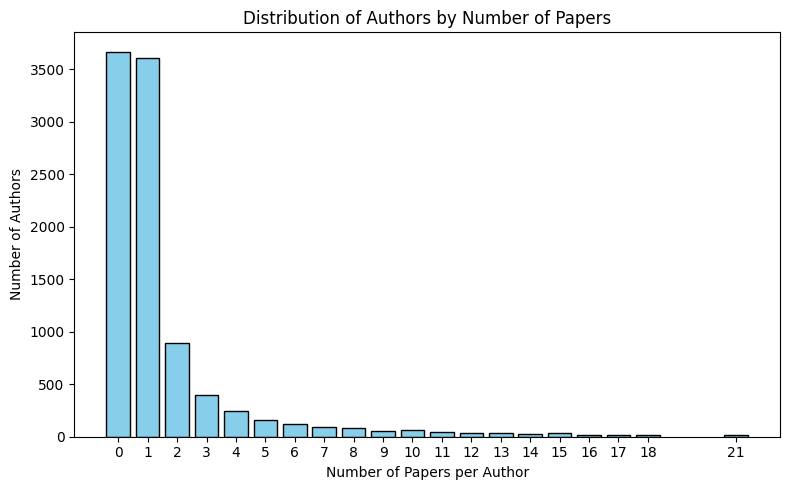

In [30]:
# Plot
plt.figure(figsize=(8,5))
plt.bar(x, y, color="skyblue", edgecolor="black")
plt.xlabel("Number of Papers per Author")
plt.ylabel("Number of Authors")
plt.title("Distribution of Authors by Number of Papers")
plt.xticks(x)
# plt.yscale("log")  # optional if skewed
plt.tight_layout()
plt.show()

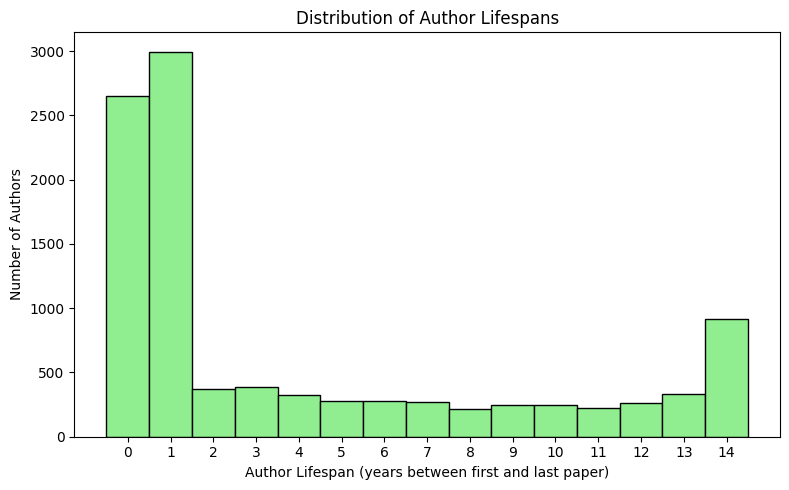

In [9]:
# Compute lifespans
lifespans = author_lifespans(author_data)

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(lifespans, bins=range(0, max(lifespans)+2), color="lightgreen", edgecolor="black", align="left")
plt.xlabel("Author Lifespan (years between first and last paper)")
plt.ylabel("Number of Authors")
plt.title("Distribution of Author Lifespans")
plt.xticks(range(0, max(lifespans)+1))
plt.tight_layout()
plt.show()

In [10]:
max(lifespans)

14

In [33]:
def get_review_scores(confs = ["ICLR.cc_2018", "ICLR.cc_2020", "ICLR.cc_2021", "ICLR.cc_2022", "ICLR.cc_2023"]):
    score_query = """MATCH (p:Paper)-[:_IS_SUBMITTED_TO]->(c:Conference {{id: "{0}"}})
MATCH (p)-[:_HAS_REVIEW]->(r:Review)
WITH p, avg(toFloat(r.score)) AS score
RETURN score"""
    scores = []
    with driver.session(database="open-review-data") as session:
        for conf in confs:
            results = session.run(score_query.format(conf))
            for record in results:
                if record["score"] is not None:
                    scores.append(record["score"])
    return scores

In [34]:
scores = get_review_scores()

/var/folders/rb/7qjlmv156wgfwfk3rlmzs_q00000gp/T/ipykernel_33390/3291765130.py:7: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="open-review-data") as session:


In [35]:
np.mean(scores)

np.float64(5.292728089325511)

In [36]:
np.std(scores)

np.float64(1.3889599278475477)

/var/folders/rb/7qjlmv156wgfwfk3rlmzs_q00000gp/T/ipykernel_33390/3291765130.py:7: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="open-review-data") as session:


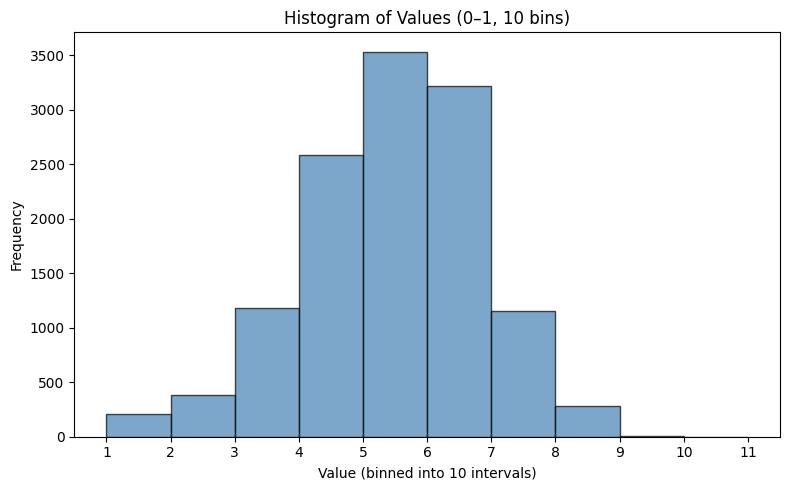

In [37]:

# for conf in ["ICLR.cc_2018", "ICLR.cc_2020", "ICLR.cc_2021", "ICLR.cc_2022", "ICLR.cc_2023"]:
#     scores = get_review_scores(confs = [conf])
#     bins = np.linspace(1, 11, 11)  # 10 bins between 0 and 1
#     plt.figure(figsize=(8,5))
#     plt.hist(scores, bins=bins, color="steelblue", edgecolor="black", alpha=0.7)
#     plt.xlabel("Value (binned into 10 intervals)")
#     plt.ylabel("Frequency")
#     plt.title("Histogram of Values (0–1, 10 bins)")
#     plt.xticks(bins)
#     plt.tight_layout()
#     plt.show()

scores = get_review_scores(confs = ["ICLR.cc_2018", "ICLR.cc_2020", "ICLR.cc_2021", "ICLR.cc_2022", "ICLR.cc_2023"])
bins = np.linspace(1, 11, 11)  # 10 bins between 0 and 1
plt.figure(figsize=(8,5))
plt.hist(scores, bins=bins, color="steelblue", edgecolor="black", alpha=0.7)
plt.xlabel("Value (binned into 10 intervals)")
plt.ylabel("Frequency")
plt.title("Histogram of Values (0–1, 10 bins)")
plt.xticks(bins)
plt.tight_layout()
plt.show()

In [38]:
def get_accpeted_review_scores(confs = ["ICLR.cc_2018", "ICLR.cc_2020", "ICLR.cc_2021", "ICLR.cc_2022", "ICLR.cc_2023"]):
    score_query = """MATCH (p:Paper {{accepted: 1}})-[:_IS_SUBMITTED_TO]->(c:Conference {{id: "{0}"}})
MATCH (p)-[:_HAS_REVIEW]->(r:Review)
WITH p, avg(toFloat(r.score)) AS score
RETURN score"""
    scores = []
    with driver.session(database="open-review-data") as session:
        for conf in confs:
            results = session.run(score_query.format(conf))
            for record in results:
                if record["score"] is not None:
                    scores.append(record["score"])
    return scores

/var/folders/rb/7qjlmv156wgfwfk3rlmzs_q00000gp/T/ipykernel_33390/1252952437.py:7: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="open-review-data") as session:


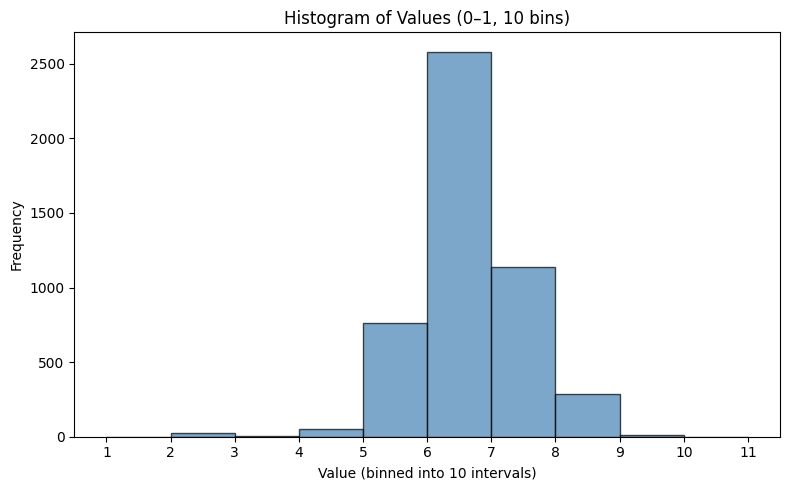

In [39]:

# for conf in ["ICLR.cc_2018", "ICLR.cc_2020", "ICLR.cc_2021", "ICLR.cc_2022", "ICLR.cc_2023"]:
#     scores = get_accpeted_review_scores(confs = [conf])
#     bins = np.linspace(1, 11, 11)  # 10 bins between 0 and 1
#     plt.figure(figsize=(8,5))
#     plt.hist(scores, bins=bins, color="steelblue", edgecolor="black", alpha=0.7)
#     plt.xlabel("Value (binned into 10 intervals)")
#     plt.ylabel("Frequency")
#     plt.title("Histogram of Values (0–1, 10 bins)")
#     plt.xticks(bins)
#     plt.tight_layout()
#     plt.show()

scores = get_accpeted_review_scores(confs = ["ICLR.cc_2018", "ICLR.cc_2020", "ICLR.cc_2021", "ICLR.cc_2022", "ICLR.cc_2023"])
bins = np.linspace(1, 11, 11)  # 10 bins between 0 and 1
plt.figure(figsize=(8,5))
plt.hist(scores, bins=bins, color="steelblue", edgecolor="black", alpha=0.7)
plt.xlabel("Value (binned into 10 intervals)")
plt.ylabel("Frequency")
plt.title("Histogram of Values (0–1, 10 bins)")
plt.xticks(bins)
plt.tight_layout()
plt.show()

In [71]:
mu, beta = 12, 5
s = np.clip(np.random.gumbel(mu, beta, 1000), 0,200)

In [115]:
np.random.dirichlet([1,1,1], size=10).tolist()

[[0.1504332479860862, 0.6384559223688566, 0.21111082964505729],
 [0.5052864756703922, 0.19267403574809933, 0.30203948858150853],
 [0.1542516223037699, 0.31557458424073775, 0.5301737934554923],
 [0.21862543819928218, 0.30166623515990243, 0.47970832664081536],
 [0.43990707569579657, 0.33523133084204665, 0.2248615934621568],
 [0.012421604771449107, 0.8094163522914194, 0.17816204293713148],
 [0.335392480857941, 0.17833208195484662, 0.48627543718721233],
 [0.2666173110947867, 0.5831908791963469, 0.15019180970886625],
 [0.0191627572164294, 0.28366627821224655, 0.6971709645713241],
 [0.9533901980855776, 0.03453498922993602, 0.012074812684486562]]

In [131]:

def generate_proportions(step=0.1):
    proportions = []
    steps = int(1 / step) + 1
    for i in range(steps):
        for j in range(steps - i):
            k = steps - i - j - 1
            p1, p2, p3 = i*step, j*step, k*step
            proportions.append((round(p1,5), round(p2,5), round(p3,5)))
    return proportions


grid_props = generate_proportions(step=0.15)
rand_props = np.random.dirichlet([1,1,1], size=25).tolist()
candidates = grid_props + rand_props


In [132]:
candidates

[(0.0, 0.0, 0.9),
 (0.0, 0.15, 0.75),
 (0.0, 0.3, 0.6),
 (0.0, 0.45, 0.45),
 (0.0, 0.6, 0.3),
 (0.0, 0.75, 0.15),
 (0.0, 0.9, 0.0),
 (0.15, 0.0, 0.75),
 (0.15, 0.15, 0.6),
 (0.15, 0.3, 0.45),
 (0.15, 0.45, 0.3),
 (0.15, 0.6, 0.15),
 (0.15, 0.75, 0.0),
 (0.3, 0.0, 0.6),
 (0.3, 0.15, 0.45),
 (0.3, 0.3, 0.3),
 (0.3, 0.45, 0.15),
 (0.3, 0.6, 0.0),
 (0.45, 0.0, 0.45),
 (0.45, 0.15, 0.3),
 (0.45, 0.3, 0.15),
 (0.45, 0.45, 0.0),
 (0.6, 0.0, 0.3),
 (0.6, 0.15, 0.15),
 (0.6, 0.3, 0.0),
 (0.75, 0.0, 0.15),
 (0.75, 0.15, 0.0),
 (0.9, 0.0, 0.0),
 [0.3404074017477498, 0.08494448477290607, 0.5746481134793442],
 [0.18947543834234615, 0.736897082494993, 0.07362747916266094],
 [0.9081288715662624, 0.055266289443629685, 0.03660483899010783],
 [0.353726368508269, 0.48904232002228554, 0.15723131146944558],
 [0.322177401925756, 0.5268717970421943, 0.15095080103204983],
 [0.371270841292404, 0.011195620396376674, 0.6175335383112194],
 [0.471553691367905, 0.47859412736210105, 0.04985218126999377],
 [0.1539704